In [4]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

csv_path = './data/val.csv'
df = pd.read_csv(csv_path)

# 统计 content 列的文本长度
content_lengths = df['content'].apply(len)
content_lengths.describe()

count    186875.000000
mean        504.497835
std         471.054650
min          31.000000
25%         135.000000
50%         333.000000
75%         721.000000
max        2046.000000
Name: content, dtype: float64

In [ ]:
import pandas as pd

versions = ['milvus.bert.v9', 'milvus.bert.v9_1',
            'milvus.bert.v9_3', 'milvus.bert.v9_4']
for version in versions:
    csv_path = f'./性能测试结果/title/{version}.csv'
    df = pd.read_csv(csv_path)
    df['rank'] = 1 / df['rank']
    print(f'MRR {version}', df['rank'].mean())

MRR milvus.bert.v9 0.005951180952380951
MRR milvus.bert.v9_1 0.28052494761904767
MRR milvus.bert.v9_3 0.5817444698412698


In [1]:
import pandas as pd
import jieba

csv_path = './data/val.csv'
df = pd.read_csv(csv_path)

df['content_length'] = df['content'].apply(lambda x: len(jieba.lcut(x)))
df['title_length'] = df['title'].apply(lambda x: len(jieba.lcut(x)))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/tb/r51c_p513md11vzf_byg94lw0000gn/T/jieba.cache
Loading model cost 0.268 seconds.
Prefix dict has been built successfully.


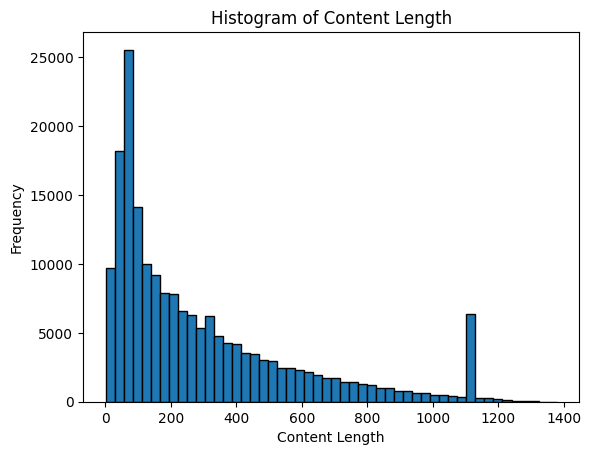

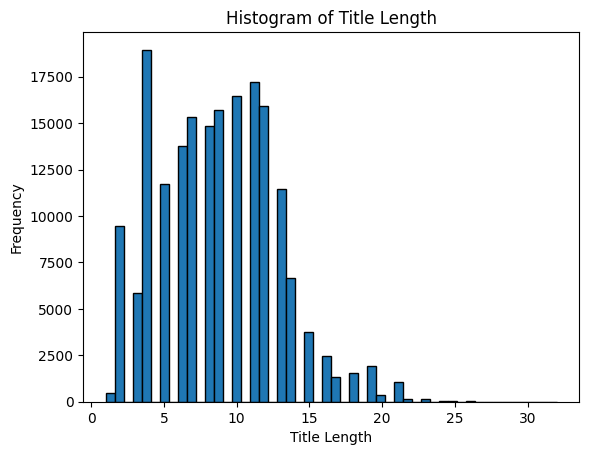

In [2]:
import matplotlib.pyplot as plt

# 绘制 content_length 列的文本长度直方图
plt.hist(df['content_length'], bins=50, edgecolor='black', log=False)
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.title('Histogram of Content Length')
plt.show()

plt.hist(df['title_length'], bins=50, edgecolor='black', log=False)
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Histogram of Title Length')
plt.show()

In [3]:
df['content_length'].describe(), df['title_length'].describe()

(count    186875.00000
 mean        294.12830
 std         288.14488
 min           1.00000
 25%          70.00000
 50%         190.00000
 75%         416.00000
 max        1378.00000
 Name: content_length, dtype: float64,
 count    186875.000000
 mean          8.735347
 std           4.063429
 min           1.000000
 25%           6.000000
 50%           9.000000
 75%          12.000000
 max          32.000000
 Name: title_length, dtype: float64)